In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# black rice

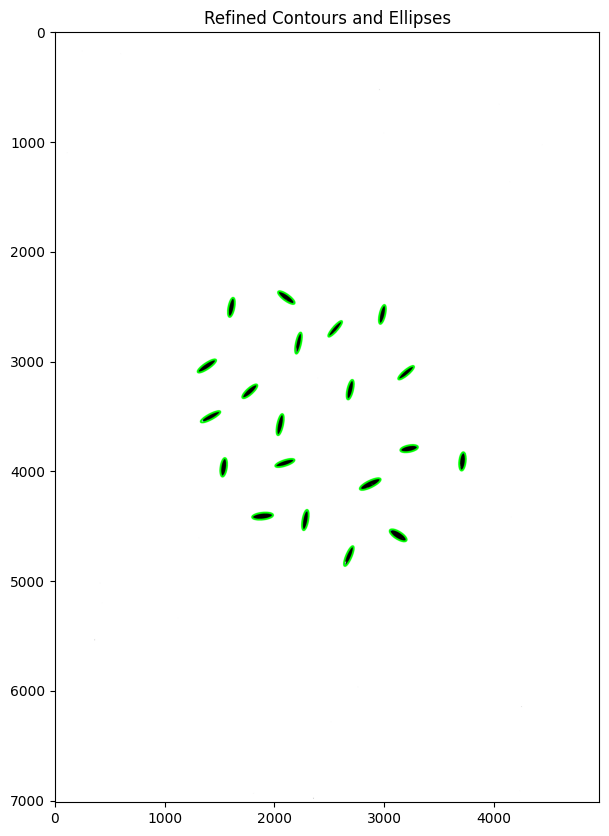

Rice grain 1: Height = 8.62 mm, Width = 2.19 mm
Rice grain 2: Height = 7.82 mm, Width = 2.95 mm
Rice grain 3: Height = 8.45 mm, Width = 2.73 mm
Rice grain 4: Height = 8.30 mm, Width = 2.28 mm
Rice grain 5: Height = 9.23 mm, Width = 2.65 mm
Rice grain 6: Height = 8.07 mm, Width = 2.24 mm
Rice grain 7: Height = 7.54 mm, Width = 2.51 mm
Rice grain 8: Height = 7.42 mm, Width = 2.54 mm
Rice grain 9: Height = 7.17 mm, Width = 2.62 mm
Rice grain 10: Height = 8.69 mm, Width = 2.31 mm
Rice grain 11: Height = 8.84 mm, Width = 2.14 mm
Rice grain 12: Height = 7.85 mm, Width = 2.39 mm
Rice grain 13: Height = 8.07 mm, Width = 2.28 mm
Rice grain 14: Height = 8.11 mm, Width = 2.06 mm
Rice grain 15: Height = 8.82 mm, Width = 2.33 mm
Rice grain 16: Height = 8.68 mm, Width = 2.04 mm
Rice grain 17: Height = 8.18 mm, Width = 1.91 mm
Rice grain 18: Height = 7.81 mm, Width = 2.23 mm
Rice grain 19: Height = 7.85 mm, Width = 2.38 mm
Rice grain 20: Height = 8.04 mm, Width = 2.48 mm


(20, 'new data/output_image_new.jpg')

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the new image
image_path = "new data/Black_White_RedRice.tif"
color_image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding
_, thresh_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY_INV)

# Apply morphological operations to remove noise
kernel = np.ones((3, 3), np.uint8)
morph_image = cv2.morphologyEx(thresh_image, cv2.MORPH_CLOSE, kernel, iterations=3)
morph_image = cv2.morphologyEx(morph_image, cv2.MORPH_OPEN, kernel, iterations=2)

# Find contours in the binary image
contours, _ = cv2.findContours(morph_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Define minimum and maximum area
min_area = 50
max_area = 50000

# Filter contours based on area range
filtered_contours = [cnt for cnt in contours if min_area < cv2.contourArea(cnt) < max_area]

# Check the number of contours found
num_contours = len(filtered_contours)

# Convert the binary image to BGR (for displaying colored contours)
output_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)

# Draw all contours on the image to visualize them
cv2.drawContours(output_image, filtered_contours, -1, (255, 0, 0), 2)  # blue color contours

valid_contours_count = 0

# Conversion factor (mm per pixel)
conversion_factor = 310 / 7015  # mm per pixel

# List to store the dimensions of the rice grains
rice_grain_dimensions = []

# Loop over the contours
for i, contour in enumerate(filtered_contours):
    # Fit an ellipse to the contour if it has at least 5 points
    if len(contour) >= 5:
        valid_contours_count += 1
        ellipse = cv2.fitEllipse(contour)
        # Draw the ellipse on the image
        cv2.ellipse(output_image, ellipse, (0, 255, 0), 15)  # Green color ellipses
        
        # Get the dimensions of the ellipse
        (center, axes, orientation) = ellipse
        major_axis_length = max(axes)  # major axis
        minor_axis_length = min(axes)  # minor axis
        
        # Convert dimensions to millimeters
        major_axis_mm = major_axis_length * conversion_factor
        minor_axis_mm = minor_axis_length * conversion_factor
        
        # Store the dimensions
        rice_grain_dimensions.append((major_axis_mm, minor_axis_mm))

# Save the output image
output_image_path = "new data/output_image_new.jpg"
cv2.imwrite(output_image_path, output_image)

# Display the image with contours using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title('Refined Contours and Ellipses')
plt.show()

# Print the dimensions of the rice grains in millimeters
for i, (major_mm, minor_mm) in enumerate(rice_grain_dimensions):
    print(f"Rice grain {i+1}: Height = {major_mm:.2f} mm, Width = {minor_mm:.2f} mm")

valid_contours_count, output_image_path

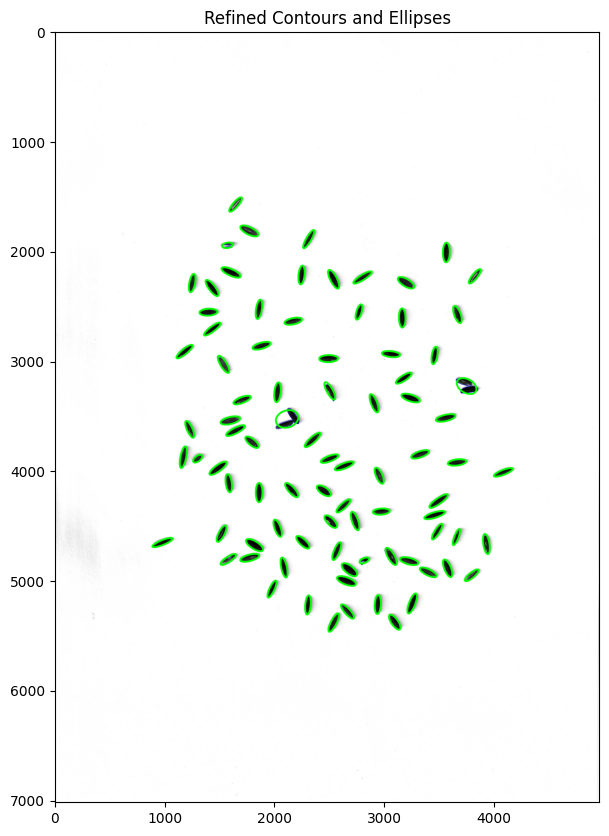

(86, 'new data/output_image_new.jpg')

In [37]:
# Load the new image
image_path = "new data/IMG_20240528_0013.jpg"
color_image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding
_, thresh_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY_INV)

# Apply morphological operations to remove noise
kernel = np.ones((3, 3), np.uint8)
morph_image = cv2.morphologyEx(thresh_image, cv2.MORPH_CLOSE, kernel, iterations=3)
morph_image = cv2.morphologyEx(morph_image, cv2.MORPH_OPEN, kernel, iterations=2)

# Find contours in the binary image
contours, _ = cv2.findContours(morph_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Define minimum and maximum area
min_area = 50
max_area = 50000

# Filter contours based on area range
filtered_contours = [cnt for cnt in contours if min_area < cv2.contourArea(cnt) < max_area]

# Check the number of contours found
num_contours = len(filtered_contours)

# Convert the binary image to BGR (for displaying colored contours)
output_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)

# Draw all contours on the image to visualize them
cv2.drawContours(output_image, filtered_contours, -1, (255, 0, 0), 2)  # blue color contours

valid_contours_count = 0

# Loop over the contours
for i, contour in enumerate(filtered_contours):
    # Fit an ellipse to the contour if it has at least 5 points
    if len(contour) >= 5:
        valid_contours_count += 1
        ellipse = cv2.fitEllipse(contour)
        # Draw the ellipse on the image
        cv2.ellipse(output_image, ellipse, (0, 255, 0), 15)  # Green color ellipses

# Save the output image
output_image_path = "new data/output_image_new.jpg"
cv2.imwrite(output_image_path, output_image)
# Display the image with contours using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title('Refined Contours and Ellipses')
plt.show()

valid_contours_count, output_image_path

# white rice

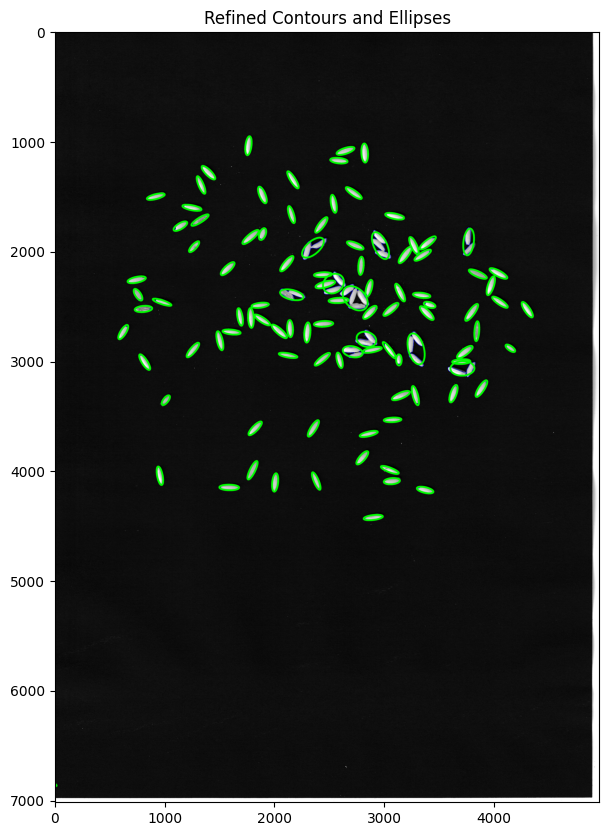

(101, 'new data/output_image_new.jpg')

In [34]:
# Load the new image
image_path = "new data/IMG_20240603_0001.jpg"
color_image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding
_, thresh_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Apply morphological operations to remove noise
kernel = np.ones((3, 3), np.uint8)
morph_image = cv2.morphologyEx(thresh_image, cv2.MORPH_CLOSE, kernel, iterations=3)
morph_image = cv2.morphologyEx(morph_image, cv2.MORPH_OPEN, kernel, iterations=2)

# Find contours in the binary image
contours, _ = cv2.findContours(morph_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Define minimum and maximum area
min_area = 50
max_area = 50000

# Filter contours based on area range
filtered_contours = [cnt for cnt in contours if min_area < cv2.contourArea(cnt) < max_area]


# Check the number of contours found
num_contours = len(filtered_contours)

# Convert the binary image to BGR (for displaying colored contours)
output_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)

# Draw all contours on the image to visualize them
cv2.drawContours(output_image, filtered_contours, -1, (255, 0, 0), 2)  # blue color contours

valid_contours_count = 0

# Loop over the contours
for i, contour in enumerate(filtered_contours):
    # Fit an ellipse to the contour if it has at least 5 points
    if len(contour) >= 5:
        valid_contours_count += 1
        ellipse = cv2.fitEllipse(contour)
        # Draw the ellipse on the image
        cv2.ellipse(output_image, ellipse, (0, 255, 0), 15)  # Green color ellipses

# Save the output image
output_image_path = "new data/output_image_new.jpg"
cv2.imwrite(output_image_path, output_image)
# Display the image with contours using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title('Refined Contours and Ellipses')
plt.show()

valid_contours_count, output_image_path

# Grain length with grain ID

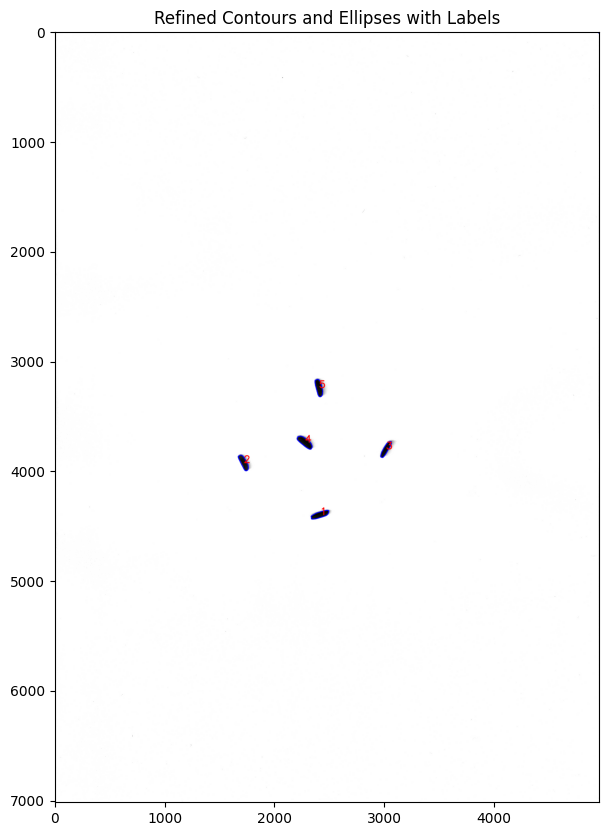

Rice grain 1: Height = 7.93 mm, Width = 2.24 mm
Rice grain 2: Height = 7.37 mm, Width = 2.34 mm
Rice grain 3: Height = 8.02 mm, Width = 1.87 mm
Rice grain 4: Height = 7.42 mm, Width = 2.84 mm
Rice grain 5: Height = 7.55 mm, Width = 2.40 mm


(5, 'new data/output_image_new.jpg')

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the new image
image_path = "new data/IMG_20240607_0005.jpg"
color_image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding
_, thresh_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY_INV)

# Apply morphological operations to remove noise
kernel = np.ones((3, 3), np.uint8)
morph_image = cv2.morphologyEx(thresh_image, cv2.MORPH_CLOSE, kernel, iterations=3)
morph_image = cv2.morphologyEx(morph_image, cv2.MORPH_OPEN, kernel, iterations=2)

# Find contours in the binary image
contours, _ = cv2.findContours(morph_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Define minimum and maximum area
min_area = 50
max_area = 50000

# Filter contours based on area range
filtered_contours = [cnt for cnt in contours if min_area < cv2.contourArea(cnt) < max_area]

# Check the number of contours found
num_contours = len(filtered_contours)

# Convert the binary image to BGR (for displaying colored contours)
output_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)

# Draw all contours on the image to visualize them
cv2.drawContours(output_image, filtered_contours, -1, (255, 0, 0), 7)  # blue color contours

valid_contours_count = 0

# Conversion factor (mm per pixel)
conversion_factor = 305 / 7015  # mm per pixel

# List to store the dimensions of the rice grains
rice_grain_dimensions = []

# Loop over the contours
for i, contour in enumerate(filtered_contours):
    # Fit an ellipse to the contour if it has at least 5 points
    if len(contour) >= 5:
        valid_contours_count += 1
        ellipse = cv2.fitEllipse(contour)
        # Draw the ellipse on the image
        # cv2.ellipse(output_image, ellipse, (0, 255, 0), 15)  # Green color ellipses
        
        # Get the dimensions of the ellipse
        (center, axes, orientation) = ellipse
        major_axis_length = max(axes)  # major axis
        minor_axis_length = min(axes)  # minor axis
        
        # Convert dimensions to millimeters
        major_axis_mm = major_axis_length * conversion_factor
        minor_axis_mm = minor_axis_length * conversion_factor
        
        # Store the dimensions
        rice_grain_dimensions.append((major_axis_mm, minor_axis_mm))
        
        # Add a label next to each ellipse
        label_position = (int(center[0]), int(center[1]))
        cv2.putText(output_image, str(valid_contours_count), label_position, 
                    cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 255), 7, cv2.LINE_AA)  # Red color labels

# Save the output image
output_image_path = "new data/output_image_new.jpg"
cv2.imwrite(output_image_path, output_image)

# Display the image with contours and labels using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title('Refined Contours and Ellipses with Labels')
plt.show()

# Print the dimensions of the rice grains in millimeters
for i, (major_mm, minor_mm) in enumerate(rice_grain_dimensions):
    print(f"Rice grain {i+1}: Height = {major_mm:.2f} mm, Width = {minor_mm:.2f} mm")

valid_contours_count, output_image_path

In [4]:
import cv2
import numpy as np

def remove_shadows(image):
    # Split the image into its color planes
    rgb_planes = cv2.split(image)
    
    # Prepare a list to store the result for each plane
    result_planes = []
    
    # Iterate over each plane
    for plane in rgb_planes:
        # Dilate the image to fill in the shadow areas
        dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
        
        # Apply median blur to smooth the dilated image
        bg_img = cv2.medianBlur(dilated_img, 21)
        
        # Subtract the background from the original plane and invert the image
        diff_img = 255 - cv2.absdiff(plane, bg_img)
        
        # Normalize the result to enhance the image
        norm_img = cv2.normalize(diff_img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
        
        # Append the processed plane to the result list
        result_planes.append(norm_img)
    
    # Merge the processed color planes back into a single image
    result = cv2.merge(result_planes)
    
    # Return the processed image
    return result

# Example usage
if __name__ == "__main__":
    # Read the image
    image = cv2.imread('new data/IMG_20240528_0001.jpg')

    # Remove shadows from the image
    shadow_removed_image = remove_shadows(image)

    # Save or display the processed image
    cv2.imwrite('results/shadow_removed_image.jpg', shadow_removed_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
